In [2]:
#Read the csv in as a dataframe
import pandas as pd
df=pd.read_csv('movies_metadata.csv')

/var/folders/5r/sp0kcnm15zb_sy3215s143_r0000gn/T/ipykernel_40346/2455944398.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_metadata.csv')


In [3]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
#The following many lines are all cleaning the dataframe up
moviescolumn=df.drop(['adult','homepage', 'id', 'imdb_id', 'overview', 'poster_path', 'tagline', 'video'], axis=1)

In [5]:
moviescolumn1=moviescolumn.drop(moviescolumn[(moviescolumn['budget']=='0')].index)

In [6]:
moviescolumn2=moviescolumn1.drop(moviescolumn1[(moviescolumn1['release_date']<='2000-01-01')].index)

In [7]:
moviescolumn2['budget'].isnull().values.any()

False

In [8]:
#kept this in because it's interesting and caused lots of grief
moviescolumn2['budget']=pd.to_numeric(moviescolumn2['budget'])

ValueError: Unable to parse string "/zaSf5OG7V8X8gqFvly88zDdRm46.jpg" at position 4901

In [9]:
#There happened to be a random .jpg link at position 4901 so that was removed
moviescolumn2['budget'][4900:]

35584                             3000000
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
35664                             5400000
35672                             1500000
35674                            10000000
                       ...               
45402                             2000000
45408                             2000000
45409                              800000
45412                             2000000
45422                             5000000
Name: budget, Length: 954, dtype: object

In [10]:
MCF=moviescolumn2.drop(moviescolumn2[4901:4902].index)

In [11]:
#Converted to numeric
MCF['budget']=pd.to_numeric(MCF['budget'])
print(MCF['budget'])

3060     11000000
3072      7000000
3073     90000000
3107      9000000
3121     36000000
           ...   
45402     2000000
45408     2000000
45409      800000
45412     2000000
45422     5000000
Name: budget, Length: 5853, dtype: int64


In [439]:
#Created an ROI column
MCF['ROI']=(MCF['revenue']-MCF['budget'])/MCF['budget']

In [440]:
#A dataframe of the highest 200 ROI films, what do they have in common?
HighestROI=(MCF.sort_values(by=['ROI'], ascending=False)).head(200)

In [441]:
#removing budget with less than $5000
HighestROI

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,ROI
14372,NaN,8,"[{'id': 10752, 'name': 'War'}, {'id': 35, 'nam...",ko,웰컴 투 동막골,4.222195,"[{'name': 'Film It Suda', 'id': 5659}]","[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2005-08-04,33579813.0,133.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Welcome to Dongmakgol,7.7,49.0,4.197476e+06
22278,NaN,1,"[{'id': 35, 'name': 'Comedy'}]",en,Aquí Entre Nos,0.230075,[],"[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",2012-03-30,2755584.0,73.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,Aquí Entre Nos,6.0,3.0,2.755583e+06
25989,NaN,10,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,Nurse 3-D,5.192042,"[{'name': 'Lions Gate', 'id': 6644}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-09-28,10000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Nurse 3-D,4.9,120.0,9.999990e+05
16664,NaN,93,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,From Prada to Nada,11.096527,"[{'name': 'Lewis Gilbert Productions', 'id': 1...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-01-28,2500000.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From Prada to Nada,5.0,87.0,2.688072e+04
14192,"{'id': 41437, 'name': 'Paranormal Activity Col...",15000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",en,Paranormal Activity,12.706424,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-09-14,193355800.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Paranormal Activity,5.9,1351.0,1.288939e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,"{'id': 2806, 'name': 'American Pie Collection'...",30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,American Pie 2,10.25103,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08-10,287553595.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,American Pie 2,6.0,1375.0,8.585120e+00
10811,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,Madea's Family Reunion,4.304175,"[{'name': 'Lions Gate Films', 'id': 35}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-02-24,57231524.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Madea's Family Reunion,6.0,77.0,8.538587e+00
11170,"{'id': 86092, 'name': 'Step Up Collection', 'p...",12000000,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",en,Step Up,14.21769,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-08-11,114194847.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Step Up,6.7,1092.0,8.516237e+00
4863,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,The Lord of the Rings: The Fellowship of the Ring,32.070725,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2001-12-18,871368364.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Lord of the Rings: The Fellowship of the Ring,8.0,8892.0,8.369552e+00


In [442]:
FROI=HighestROI.drop(HighestROI[(HighestROI['budget']<=5000)].index)

In [443]:
FROI

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,ROI
14192,"{'id': 41437, 'name': 'Paranormal Activity Col...",15000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",en,Paranormal Activity,12.706424,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-09-14,193355800.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Paranormal Activity,5.9,1351.0,12889.386667
7788,"{'id': 475802, 'name': 'Super Size Me Collecti...",65000,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",en,Super Size Me,5.266103,"[{'name': 'Kathbur Pictures', 'id': 8735}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-01-17,28575078.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Super Size Me,6.6,520.0,438.616585
31628,NaN,100000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,The Gallows,7.51505,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-07-10,42664410.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Gallows,4.9,370.0,425.644100
9461,"{'id': 86113, 'name': 'Open Water Collection',...",130000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",en,Open Water,10.652818,"[{'name': 'Plunge Pictures LLC', 'id': 22376}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,54667954.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Open Water,5.3,320.0,419.522723
42308,NaN,100000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",en,A Ghost Story,24.339781,"[{'name': 'Sailor Bear', 'id': 14634}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-07-07,15584255.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Ghost Story,6.8,95.0,154.842550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,"{'id': 2806, 'name': 'American Pie Collection'...",30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,American Pie 2,10.25103,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08-10,287553595.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,American Pie 2,6.0,1375.0,8.585120
10811,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,Madea's Family Reunion,4.304175,"[{'name': 'Lions Gate Films', 'id': 35}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-02-24,57231524.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Madea's Family Reunion,6.0,77.0,8.538587
11170,"{'id': 86092, 'name': 'Step Up Collection', 'p...",12000000,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",en,Step Up,14.21769,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-08-11,114194847.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Step Up,6.7,1092.0,8.516237
4863,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,The Lord of the Rings: The Fellowship of the Ring,32.070725,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2001-12-18,871368364.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Lord of the Rings: The Fellowship of the Ring,8.0,8892.0,8.369552


In [444]:
#Show the title, budget, revenue, ROI of the top 10 films here
CHART1=FROI.drop(['belongs_to_collection','genres','original_language','popularity','production_companies','production_countries','release_date','runtime','spoken_languages','status','title','vote_average','vote_count'],axis=1)

In [445]:
#Nice display of some titles from the highest ROI films
#Many of these films are recognizeable by name
CHART1[:10]

,budget,original_title,revenue,ROI
14192,15000,Paranormal Activity,193355800.0,12889.386667
7788,65000,Super Size Me,28575078.0,438.616585
31628,100000,The Gallows,42664410.0,425.644100
9461,130000,Open Water,54667954.0,419.522723
42308,100000,A Ghost Story,15584255.0,154.842550
11826,160000,Once,20710513.0,128.440706
7733,400000,Napoleon Dynamite,46118097.0,114.295243
10660,169000,Keeping Mum,18564702.0,108.850308
11347,100000,Facing the Giants,10178331.0,100.783310
18338,1000000,The Devil Inside,101758490.0,100.758490


In [446]:
Graph1=CHART1[:10]

<AxesSubplot:xlabel='original_title'>

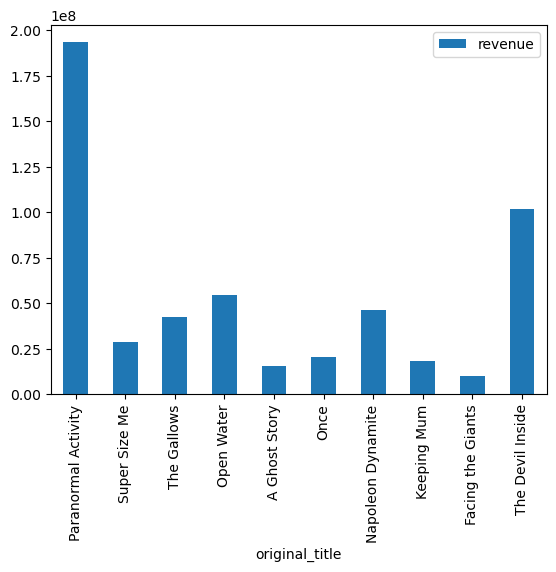

In [447]:
#Again just for my insight, didn't end up making it into the reports
import matplotlib.pyplot as plt

x_axis = [Graph1['original_title']]
y_axis = [Graph1['revenue']]
Graph1.plot(x='original_title', y='revenue', kind='bar')


<AxesSubplot:xlabel='original_title'>

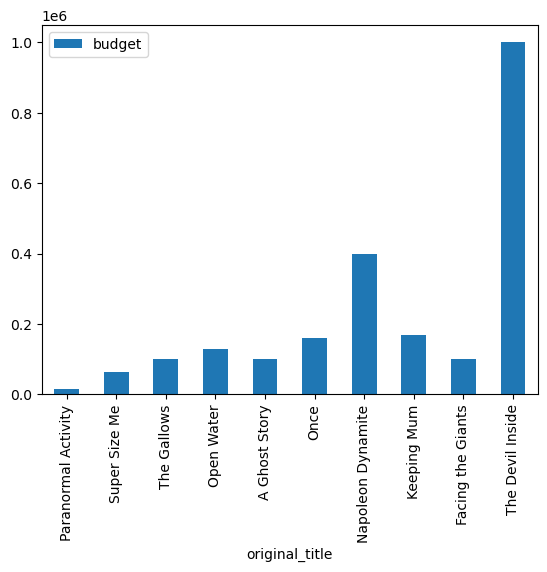

In [448]:
#Just for my own knowledge, was thinking of other ways to express
#This finding, I ended up expressing my findings differently
Graph1.plot(x='original_title', y='budget', kind='bar')

In [449]:
for a in FROI['genres']:
    eval(a)
print(type(FROI['genres']))

<class 'pandas.core.series.Series'>


In [450]:
#Append the genre column into a single list
genrelist=[]
for a in FROI['genres']:
    temp=eval(a)
    genrelist.append(temp)

In [451]:
#Panic and get stuck here for a while
genrelist

[[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}],
 [{'id': 99, 'name': 'Documentary'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 18, 'name': 'Drama'}],
 [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}],
 [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}],
 [{'id': 18, 'name': 'Drama'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 10749, 'name': 'Romance'}],
 [{'id': 18, 'name': 'Drama'},
  {'id': 10402, 'name': 'Music'},
  {'id': 10749, 'name': 'Romance'}],
 [{'id': 35, 'name': 'Comedy'}],
 [{'id': 35, 'name': 'Comedy'}],
 [{'id': 18, 'name': 'Drama'}],
 [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'name': 'Horror'}],
 [{'id': 99, 'name': 'Documentary'}],
 [{'id': 35, 'name': 'Comedy'}],
 [{'id': 27, 'name': 'Horror'}],
 [{'id': 27, 'name': 'Horror'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 80, 'name': 'Crime'}],
 [{'id': 35, 'name': 'Comedy'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10749, 'name': 'Romance'}],
 [{'id': 18, 'name': 'Drama'}],
 [{

In [452]:
#melting all these lists of dictionaries into a single list
flatgenrelist = []
for sublist in genrelist:
    for item in sublist:
        flatgenrelist.append(item)
flatgenrelist

[{'id': 27, 'name': 'Horror'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 27, 'name': 'Horror'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 18, 'name': 'Drama'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 18, 'name': 'Drama'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10402, 'name': 'Music'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 27, 'name': 'Horror'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 27, 'name': 'Horror'},
 {'id': 27, 'name': 'Horror'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 80, 'name': 'Crime'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 18, 'name': 'Drama'},
 {'id': 18, 'name': 'Drama'},
 {'id': 27,

In [453]:
#Making a long list of the genres that appear from the name key
from operator import itemgetter
res = list(map(itemgetter('name'), flatgenrelist))
res

['Horror',
 'Mystery',
 'Documentary',
 'Comedy',
 'Drama',
 'Horror',
 'Thriller',
 'Drama',
 'Thriller',
 'Drama',
 'Fantasy',
 'Romance',
 'Drama',
 'Music',
 'Romance',
 'Comedy',
 'Comedy',
 'Drama',
 'Thriller',
 'Horror',
 'Documentary',
 'Comedy',
 'Horror',
 'Horror',
 'Mystery',
 'Crime',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Horror',
 'Thriller',
 'Horror',
 'Thriller',
 'Science Fiction',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Horror',
 'Thriller',
 'Mystery',
 'Thriller',
 'Horror',
 'Documentary',
 'Horror',
 'Horror',
 'Comedy',
 'Thriller',
 'Horror',
 'Horror',
 'Drama',
 'Thriller',
 'Documentary',
 'Drama',
 'Drama',
 'Thriller',
 'Drama',
 'Horror',
 'Thriller',
 'Drama',
 'Comedy',
 'Foreign',
 'Comedy',
 'Horror',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Horror',
 'Thriller',
 'Horror',
 'Thriller',
 'Science Fiction',
 'Drama',
 'Drama',
 'Science Fiction',
 'Horror',
 'Thriller',
 'Horror',
 'Horror',
 'Thriller',
 'Drama',
 'History

In [454]:
#Lets return the count of each of these categories
from collections import Counter
genres=Counter(res)
print(genres)

Counter({'Drama': 86, 'Comedy': 61, 'Thriller': 49, 'Horror': 45, 'Romance': 38, 'Action': 21, 'Adventure': 20, 'Fantasy': 17, 'Mystery': 13, 'Crime': 12, 'Animation': 12, 'Science Fiction': 10, 'Documentary': 9, 'Family': 9, 'History': 8, 'Music': 6, 'War': 4, 'Foreign': 1})


In [455]:
#Was stuck here for a while, I needed to convert this because I couldn't
#do work on this kind of object
type(genres)

collections.Counter

In [456]:
#Getting counts
d = dict(Counter(res))
d

{'Horror': 45,
 'Mystery': 13,
 'Documentary': 9,
 'Comedy': 61,
 'Drama': 86,
 'Thriller': 49,
 'Fantasy': 17,
 'Romance': 38,
 'Music': 6,
 'Crime': 12,
 'Science Fiction': 10,
 'Foreign': 1,
 'History': 8,
 'War': 4,
 'Animation': 12,
 'Adventure': 20,
 'Family': 9,
 'Action': 21}

In [457]:
#Sorting the data
sorted_genres = sorted(d.items(), key=lambda x:x[1], reverse=True)
sorted_genres
DSG=dict(sorted_genres)

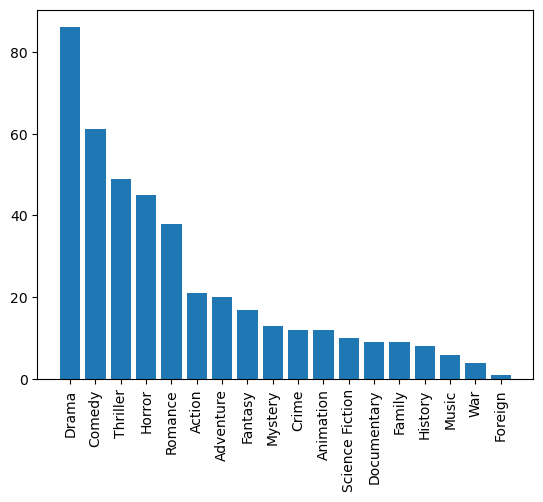

In [458]:
#barchart of genres for the highest ROI films
g = list(DSG.keys())
v = list(DSG.values())

plt.bar(range(len(DSG)), v, tick_label=g)
ax1 = plt.subplot()
ax1.set_xticklabels(g,rotation=90)
plt.show()

In [462]:
#lets make a scatterplot for budget vs. revenue
#Lots of 0 values so I'm only including films with revenues and budgets
#in excess of $10,000
MCF
scatterplot=MCF
scatterplot=scatterplot.drop(scatterplot[(scatterplot['revenue']<=10000)].index)
scatterplot=scatterplot.drop(scatterplot[(scatterplot['budget']<=10000)].index)
scatterplot=scatterplot.drop(scatterplot[(scatterplot['revenue']>=2000000000)].index)
scatterplot

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,ROI
3060,"{'id': 43563, 'name': 'Friday Collection', 'po...",11000000,"[{'id': 35, 'name': 'Comedy'}]",en,Next Friday,10.06545,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Next Friday,6.5,145.0,4.438848
3073,NaN,90000000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Supernova,5.496624,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Supernova,4.9,109.0,-0.835244
3121,NaN,36000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",de,Isn't She Great,0.907927,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-28,3003296.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Isn't She Great,4.6,14.0,-0.916575
3155,"{'id': 2602, 'name': 'Scream Collection', 'pos...",40000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",en,Scream 3,9.738371,"[{'name': 'Konrad Pictures', 'id': 85}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-03,161834276.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Scream 3,5.7,749.0,3.045857
3158,NaN,10000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,Gun Shy,6.370105,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-04,1631839.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Gun Shy,5.4,24.0,-0.836816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45167,NaN,11000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,Wind River,40.796775,"[{'name': 'Thunder Road Pictures', 'id': 3528}...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-08-03,184770205.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Wind River,7.4,181.0,15.797291
45250,NaN,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",ta,சிவாஜி,1.323587,"[{'name': 'AVM Productions', 'id': 16424}]","[{'iso_3166_1': 'IN', 'name': 'India'}]",2007-06-14,19000000.0,185.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}, {'iso_6...",Released,Sivaji: The Boss,6.9,25.0,0.583333
45409,NaN,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Dikari,0.903061,[],[],2006-11-23,1328612.0,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Savages,5.8,6.0,0.660765
45412,NaN,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,Про любоff,0.121844,"[{'name': 'Profit', 'id': 21163}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2010-09-30,1268793.0,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Pro Lyuboff,4.0,3.0,-0.365604


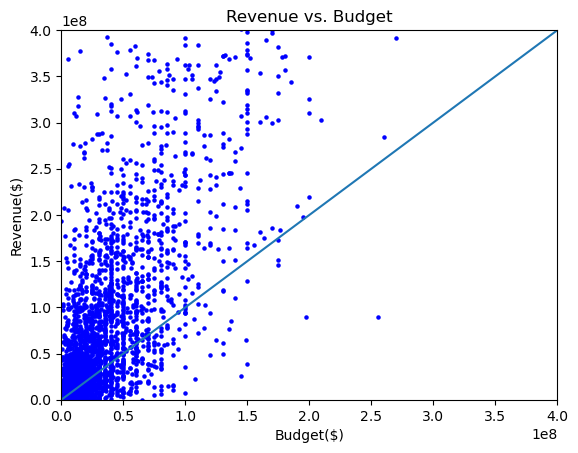

In [463]:
#Very nice scatterplot showing the trend between budget and revenue
#The added y=x line should indicate a breakeven point for these films
import numpy as np
import matplotlib.pyplot as plt
x = scatterplot['budget']
y = scatterplot['revenue']
area=5
plt.scatter(x, y, s=area, c='blue',alpha=0.99)
plt.axline((0, 0), slope=1)
plt.title('Revenue vs. Budget')
plt.xlabel('Budget($)')
plt.ylabel('Revenue($)')
plt.xlim(0, 400000000)
plt.ylim(0, 400000000)
plt.show()

In [464]:
#Films that lose money, what do they have in common?
#These films have a budget and revenue larger than $10,000 however they lost money
#I made a list with the profitable movies while I was at it
#I later combined these lists so we had a full view of the movies
problem_movies=MCF
problem_movies['money_loss']=problem_movies['revenue']-problem_movies['budget']
problem_movies=problem_movies.drop(problem_movies[(problem_movies['revenue']<=10000)].index)
problem_movies=problem_movies.drop(problem_movies[(problem_movies['budget']<=10000)].index)
problem_movies=problem_movies.drop(problem_movies[(problem_movies['money_loss']>0)].index)
profitable_movies=MCF
profitable_movies=profitable_movies.drop(profitable_movies[(profitable_movies['revenue']<=10000)].index)
profitable_movies=profitable_movies.drop(profitable_movies[(profitable_movies['budget']<=10000)].index)
profitable_movies=profitable_movies.drop(profitable_movies[(profitable_movies['money_loss']<0)].index)
problem_movies

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,ROI,money_loss
3073,NaN,90000000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Supernova,5.496624,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Supernova,4.9,109.0,-0.835244,-75171919.0
3121,NaN,36000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",de,Isn't She Great,0.907927,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-28,3003296.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Isn't She Great,4.6,14.0,-0.916575,-32996704.0
3158,NaN,10000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,Gun Shy,6.370105,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-04,1631839.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Gun Shy,5.4,24.0,-0.836816,-8368161.0
3181,NaN,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Hanging Up,6.474767,"[{'name': 'Laurence Mark Productions', 'id': 4...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-02-16,36037909.0,94.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Hanging Up,5.0,42.0,-0.099052,-3962091.0
3198,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",en,Reindeer Games,12.11759,"[{'name': 'Dimension Films', 'id': 7405}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-25,32168970.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Reindeer Games,5.3,175.0,-0.234072,-9831030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44428,NaN,2000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",ru,Нирвана,0.679141,[],"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2008-07-03,273137.0,93.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Nirvana,4.7,5.0,-0.863432,-1726863.0
44557,NaN,10000000,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",ru,Батальонъ,1.557671,"[{'name': 'Art Pictures Studio', 'id': 3451}, ...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2015-02-20,7547762.0,120.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,The Battalion,5.9,6.0,-0.245224,-2452238.0
44856,NaN,3000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",ru,Na Kryuchke!,0.445269,"[{'name': 'Profit', 'id': 21163}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2011-02-03,1957000.0,90.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,On the Hook!,4.7,3.0,-0.347667,-1043000.0
45412,NaN,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,Про любоff,0.121844,"[{'name': 'Profit', 'id': 21163}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2010-09-30,1268793.0,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Pro Lyuboff,4.0,3.0,-0.365604,-731207.0


In [485]:
#We know from this that 69.14% of the movies within my dataset here
#Make money
(len(profitable_movies))/(len(profitable_movies)+len(problem_movies))

0.6914387633769322

In [474]:
#Making a list of the genres that lost money
badgenrelist=[]
for a in problem_movies['genres']:
    temp=eval(a)
    badgenrelist.append(temp)

flatbadgenrelist = []
for sublist in badgenrelist:
    for item in sublist:
        flatbadgenrelist.append(item)

from operator import itemgetter
res2 = list(map(itemgetter('name'), flatbadgenrelist))

from collections import Counter
d2 = dict(Counter(res2))

In [475]:
#Sorting list so its clean looking
sorted_genres2 = sorted(d2.items(), key=lambda x:x[1], reverse=True)
sorted_genres2
DSG2=dict(sorted_genres2)

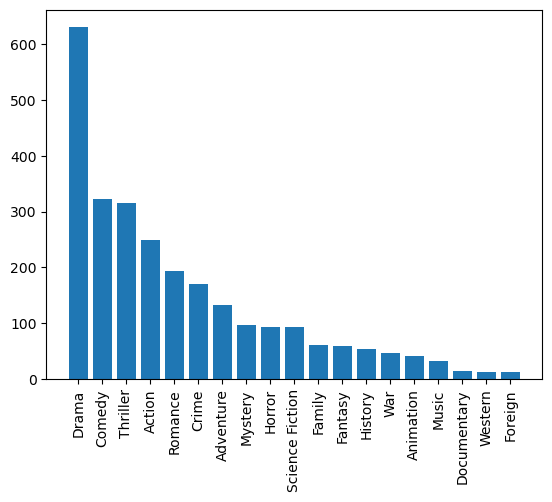

In [476]:
#Barchart breaking down the count of films that lost money by genre
g2 = list(DSG2.keys())
v2 = list(DSG2.values())

plt.bar(range(len(DSG2)), v2, tick_label=g2)
ax1 = plt.subplot()
ax1.set_xticklabels(g2,rotation=90)
plt.show()

In [505]:
#Making a list with the number of films that lost money per country
badoriginlist=[]
for a in problem_movies['production_countries']:
    temp=eval(a)
    badoriginlist.append(temp)

flatbadoriginlist = []
for sublist in badoriginlist:
    for item in sublist:
        flatbadoriginlist.append(item)

from operator import itemgetter
o = list(map(itemgetter('name'), flatbadoriginlist))

from collections import Counter
origin= dict(Counter(o))

In [509]:
#Sort the dataframe so the barchart is clean
sorted_origin = sorted(origin.items(), key=lambda x:x[1], reverse=True)
DSO=dict(sorted_origin)

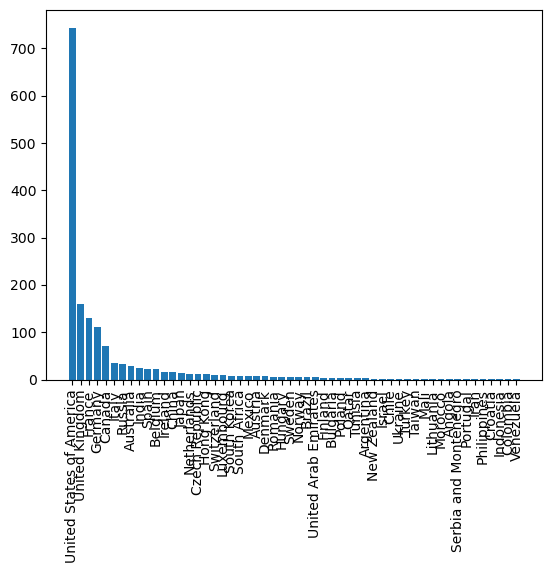

In [510]:
#Again not very insightful, but the number of movies that lost money
#By each country
g3 = list(DSO.keys())
v3 = list(DSO.values())

plt.bar(range(len(DSO)), v3, tick_label=g3)
ax1 = plt.subplot()
ax1.set_xticklabels(g3,rotation=90)
plt.show()

In [511]:
#Making a list of movies that made money, this technique
#is very similar to the one done for genre
goodoriginlist=[]
for a in profitable_movies['production_countries']:
    temp=eval(a)
    goodoriginlist.append(temp)

flatgoodoriginlist = []
for sublist in goodoriginlist:
    for item in sublist:
        flatgoodoriginlist.append(item)

from operator import itemgetter
o2 = list(map(itemgetter('name'), flatgoodoriginlist))

from collections import Counter
origin2= dict(Counter(o2))
sorted_origin2 = sorted(origin2.items(), key=lambda x:x[1], reverse=True)
DSO2=dict(sorted_origin2)

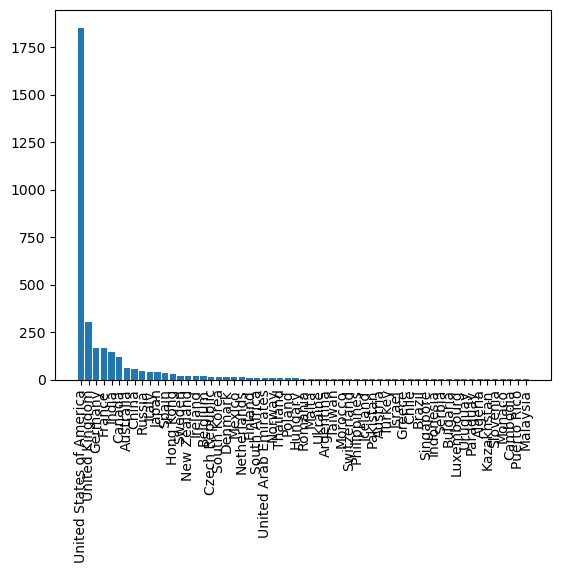

In [512]:
#Didn't find this insightful but another bar chart of the number of
#Films that made money per country
g4 = list(DSO2.keys())
v4 = list(DSO2.values())

plt.bar(range(len(DSO2)), v4, tick_label=g4)
ax1 = plt.subplot()
ax1.set_xticklabels(g4,rotation=90)
plt.show()

In [519]:
#subtracting the number of movies that lost money from the number
#That made money
d3 = {key: DSO2[key] - DSO.get(key, 0) for key in DSO2}

In [535]:
#Sorting the dataframe for country and number of films that lost money
d3sorted = sorted(d3.items(), key=lambda x:x[1], reverse=False)
badorigindf=pd.DataFrame(d3sorted)
badorigindf.columns=['Country','Profitable Count']

In [536]:
#Chart for the worst country to make a movie in
badorigindf.head()

,Country,Profitable Count
0,Luxembourg,-9
1,Belgium,-6
2,Switzerland,-6
3,Austria,-4
4,Brazil,-3


In [537]:
#Chart for the best countries to make a movie in
badorigindf.tail()

,Country,Profitable Count
54,Canada,46
55,Germany,56
56,India,120
57,United Kingdom,144
58,United States of America,1109


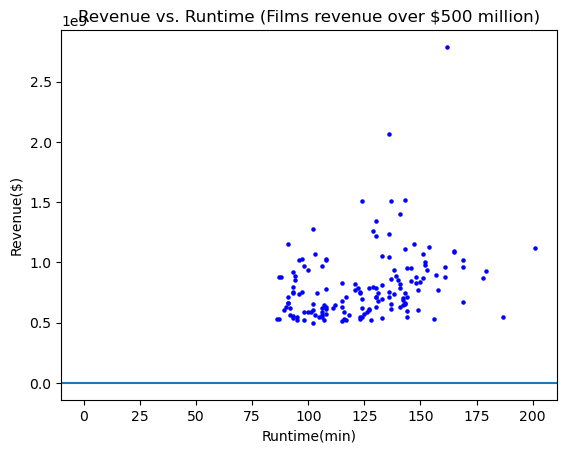

In [570]:
#Runtime vs. revenue
#only including movies that made over $500 million
moviesRV=MCF
moviesRV=moviesRV.drop(moviesRV[(moviesRV['revenue']<=500000000)].index)
moviesRV=moviesRV.drop(moviesRV[(moviesRV['budget']<=10000)].index)
import numpy as np
import matplotlib.pyplot as plt
x = moviesRV['runtime']
y = moviesRV['revenue']
area=5
plt.scatter(x, y, s=area, c='blue',alpha=0.99)
plt.axline((0, 0), slope=1)
plt.title('Revenue vs. Runtime (Films revenue over $500 million)')
plt.xlabel('Runtime(min)')
plt.ylabel('Revenue($)')

plt.show()

In [545]:
#Count for the number of high revenue movies from each country
#Didn't end up finding this very insightful
HighRV=[]
for a in moviesRV['production_countries']:
    temp=eval(a)
    HighRV.append(temp)

flatRV = []
for sublist in HighRV:
    for item in sublist:
        flatRV.append(item)

from operator import itemgetter
o3 = list(map(itemgetter('name'), flatRV))

from collections import Counter
origin3= dict(Counter(o3))
sorted_origin3 = sorted(origin3.items(), key=lambda x:x[1], reverse=True)
RV=dict(sorted_origin3)
RV

{'United States of America': 152,
 'United Kingdom': 31,
 'Germany': 7,
 'New Zealand': 7,
 'China': 4,
 'Canada': 3,
 'Malta': 2,
 'France': 2,
 'Czech Republic': 2,
 'Taiwan': 2,
 'Japan': 2,
 'Australia': 1,
 'Italy': 1,
 'United Arab Emirates': 1,
 'Hong Kong': 1,
 'Netherlands': 1}

In [547]:
#Getting a count of the number of high revenue movies per production company
HighRV=[]
for a in moviesRV['production_companies']:
    temp=eval(a)
    HighRV.append(temp)

flatRV = []
for sublist in HighRV:
    for item in sublist:
        flatRV.append(item)

from operator import itemgetter
o3 = list(map(itemgetter('name'), flatRV))

from collections import Counter
origin3= dict(Counter(o3))
sorted_origin3 = sorted(origin3.items(), key=lambda x:x[1], reverse=True)
RV=dict(sorted_origin3)
RV

{'Walt Disney Pictures': 28,
 'Warner Bros.': 25,
 'Paramount Pictures': 14,
 'Universal Pictures': 13,
 'Pixar Animation Studios': 12,
 'Marvel Studios': 12,
 'Columbia Pictures': 11,
 'Twentieth Century Fox Film Corporation': 11,
 'DreamWorks Animation': 11,
 'Heyday Films': 8,
 'Legendary Pictures': 8,
 'WingNut Films': 7,
 'DreamWorks SKG': 7,
 'Revolution Sun Studios': 7,
 'New Line Cinema': 6,
 'Amblin Entertainment': 6,
 'DC Entertainment': 6,
 'Syncopy': 6,
 'Illumination Entertainment': 6,
 'TSG Entertainment': 6,
 'Lucasfilm': 5,
 'Jerry Bruckheimer Films': 5,
 'Di Bonaventura Pictures': 5,
 'Hasbro Studios': 5,
 'Original Film': 5,
 'Walt Disney Animation Studios': 5,
 'Marvel Entertainment': 5,
 'Fuji Television Network': 5,
 'Dentsu': 5,
 '1492 Pictures': 4,
 'Marvel Enterprises': 4,
 'Village Roadshow Pictures': 4,
 'Blue Sky Studios': 4,
 'Twentieth Century Fox Animation': 4,
 'Summit Entertainment': 4,
 'Sunswept Entertainment': 4,
 'Temple Hill Entertainment': 4,
 'Dun

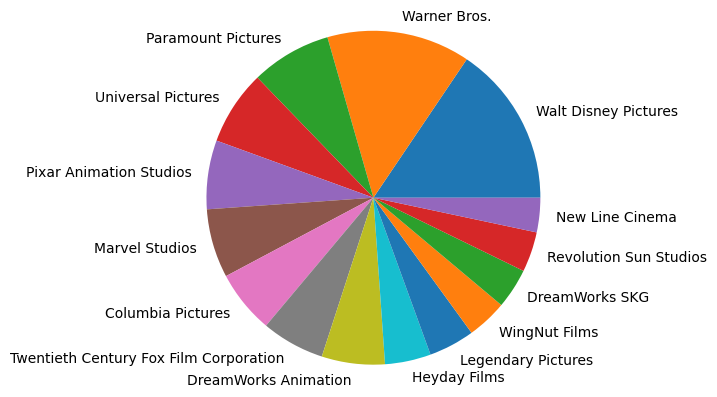

In [569]:
#I made a pie chart to show what production companies make the most
#High revenue movies
first_key = list(RV)[0:15]
first_val = list(RV.values())[0:15]

# Plot
plt.pie(first_val, labels=first_key)

plt.axis('equal')
plt.show()

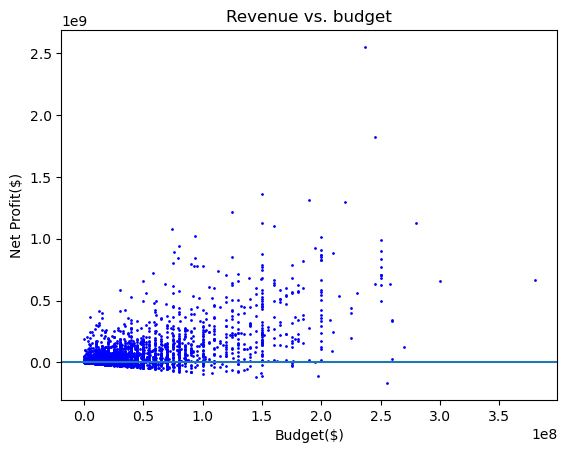

In [579]:
#Another scatterplot this was just for my understanding, revenue vs. budget
x = all_movies['budget']
y = all_movies['money_loss']
area=1
plt.scatter(x, y, s=area, c='blue',alpha=0.99)
plt.axline((0, 0), slope=0)
plt.title('Revenue vs. budget')
plt.xlabel('Budget($)')
plt.ylabel('Net Profit($)')

plt.show()

In [14]:
#A new dataframe to begin looking at ratings, only including films that
#meet the $10,000 threshold AND have been rated by at least 50 users.
all_movies=MCF
all_movies['money_loss']=all_movies['revenue']-all_movies['budget']
all_movies=all_movies.drop(all_movies[(all_movies['revenue']<=10000)].index)
all_movies=all_movies.drop(all_movies[(all_movies['budget']<=10000)].index)
all_movies=all_movies.drop(all_movies[(all_movies['vote_count']<50)].index)

all_movies

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,money_loss
3060,"{'id': 43563, 'name': 'Friday Collection', 'po...",11000000,"[{'id': 35, 'name': 'Comedy'}]",en,Next Friday,10.06545,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Next Friday,6.5,145.0,48827328.0
3073,NaN,90000000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Supernova,5.496624,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Supernova,4.9,109.0,-75171919.0
3155,"{'id': 2602, 'name': 'Scream Collection', 'pos...",40000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",en,Scream 3,9.738371,"[{'name': 'Konrad Pictures', 'id': 85}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-03,161834276.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Scream 3,5.7,749.0,121834276.0
3167,NaN,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",en,The Beach,14.430311,"[{'name': 'Figment Films', 'id': 359}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-02-11,144056873.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Beach,6.3,1271.0,104056873.0
3169,NaN,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,The Tigger Movie,7.023414,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-11,45554533.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Tigger Movie,6.3,146.0,15554533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44821,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",ja,Pokémon 3: The Movie,6.480376,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,6.0,144.0,52411275.0
44842,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,Transformers: The Last Knight,39.186819,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-21,604942143.0,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Transformers: The Last Knight,6.2,1440.0,344942143.0
45014,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,The Dark Tower,50.903593,"[{'name': 'Imagine Entertainment', 'id': 23}, ...","[{'iso_3166_1': 'ZA', 'name': 'South Africa'},...",2017-08-03,71000000.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Dark Tower,5.7,688.0,11000000.0
45139,NaN,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,The Emoji Movie,33.694599,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-07-28,66913939.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Emoji Movie,5.8,327.0,16913939.0


In [22]:
#lets take a look at the highest rated films from this dataset
all_movies.sort_values(by=['vote_average'], ascending=False)

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,money_loss
5481,NaN,15000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",ja,千と千尋の神隠し,41.048867,"[{'name': 'Studio Ghibli', 'id': 10342}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-07-20,2.749251e+08,125.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spirited Away,8.3,3968.0,259925095.0
12481,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,The Dark Knight,123.167259,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2008-07-16,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Dark Knight,8.3,12269.0,819558444.0
23673,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.29999,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,1.309200e+07,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,8.3,4376.0,9792000.0
25465,NaN,4900000,"[{'id': 18, 'name': 'Drama'}]",en,Mommy,14.876086,"[{'name': 'Téléfilm Canada', 'id': 806}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-05-22,3.494070e+06,138.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Mommy,8.2,734.0,-1405930.0
9698,NaN,24000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",ja,ハウルの動く城,16.136048,"[{'name': 'Studio Ghibli', 'id': 10342}, {'nam...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2004-11-19,2.347105e+08,119.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Howl's Moving Castle,8.2,2049.0,210710455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,NaN,40000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,FearDotCom,5.160215,"[{'name': 'Milagro Films', 'id': 1070}, {'name...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2002-08-09,1.890202e+07,101.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,FearDotCom,3.2,106.0,-21097985.0
12911,NaN,25000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,Disaster Movie,11.634132,"[{'name': 'Grosvenor Park Media Ltd.', 'id': 2...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-08-29,1.410928e+07,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Disaster Movie,3.1,250.0,-10890716.0
9651,"{'id': 149704, 'name': 'Alone in the Dark Coll...",20000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",en,Alone in the Dark,5.871243,[{'name': 'Boll Kino Beteiligungs GmbH & Co. K...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2005-01-28,1.044281e+07,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Alone in the Dark,3.1,174.0,-9557192.0
3471,NaN,44000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,Battlefield Earth,5.276926,"[{'name': 'Franchise Pictures', 'id': 1403}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-10,2.140000e+07,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Battlefield Earth,3.0,259.0,-22600000.0


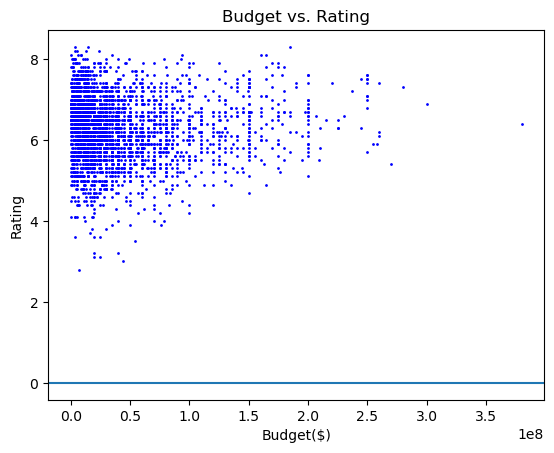

In [24]:
#Scatterplot for budget vs. vote_average
import numpy as np
import matplotlib.pyplot as plt
x = all_movies['budget']
y = all_movies['vote_average']
area=1
plt.scatter(x, y, s=area, c='blue',alpha=0.99)
plt.axline((0, 0), slope=0)
plt.title('Budget vs. Rating')
plt.xlabel('Budget($)')
plt.ylabel('Rating')

plt.show()

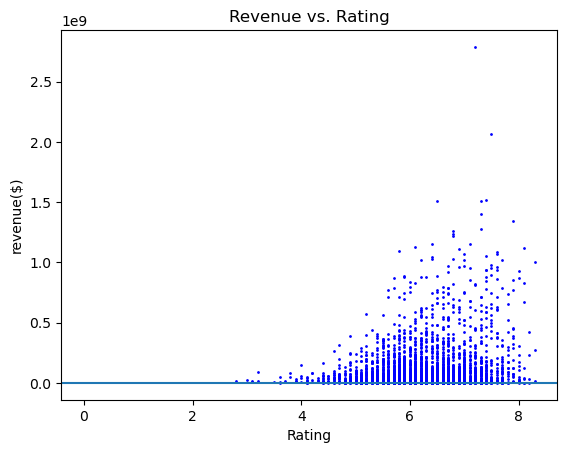

In [28]:
#Decided to put ratings on the x-axis and generated a nice bell-shaped curve
import numpy as np
import matplotlib.pyplot as plt
x = all_movies['vote_average']
y = all_movies['revenue']
area=1
plt.scatter(x, y, s=area, c='blue',alpha=0.99)
plt.axline((0, 0), slope=0)
plt.title('Revenue vs. Rating')
plt.ylabel('revenue($)')
plt.xlabel('Rating')

plt.show()

In [ ]:
#Thank you for taking a look at my work :)
